# Predict breast cancer


Predict the class of breast cancer (malignant or ‘bad’ versus benign or ‘good’) from the features of images taken from breast samples. Ten biological attributes of the cancer cell nuclei have been calculated from the images, as described below:
Attribute 	Domain
1. Sample code number 	id number
2. Clump Thickness 	1 - 10
3. Uniformity of Cell Size 	1 - 10
4. Uniformity of Cell Shape 	1 - 10
5. Marginal Adhesion 	1 - 10
6. Single Epithelial Cell Size 	1 - 10
7. Bare Nuclei 	1 - 10
8. Bland Chromatin 	1 - 10
9. Normal Nucleoli 	1 - 10
10. Mitoses 	1 - 10
11. Class 	(2 for benign, 4 for malignant)

Questions:

    1. What are the factors that predict malignant cancer? (i.e. which variables significantly predict malignancy, p < 0.05)
    2. Create a classification report and confusion matrix of predicted and observed values. What is the accuracy, precision, recall and F1-score of the model on the (a) training and (b) test data?
    3. Plot a Receiver Operating Characteristic (ROC) curve on the test data.
    4. What is overdispersion?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
cancer_prediction = pd.read_csv("cancer.data")

In [3]:
cancer_prediction.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
cancer_prediction.describe()

,1000025,5,1,1.1,1.2,2,3,1.4,1.5,2.1
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
cancer_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
cancer_prediction.isnull().values.any()

False

We can see that there are 698 rows and the sixth column contain object datatypes. 
we will change that later, for now we will rename the columns.

In [7]:
cancer_prediction.rename (inplace=True, columns={
    '1000025':'Sample code number',
    '5':'Clump Thickness',
    '1':'Uniformity of Cell Size',
    '1.1':'Uniformity of Cell Shape',
    '1.2':'Marginal Adhesion',
    '2':'Single Epithelial Cell Size',
    '1.3':'Bare Nuclei',
    '3':'Bland Chromatin',
    '1.4':'Normal Nucleoli',
    '1.5':'Mitoses',
    '2.1':'Class'
})   

In [8]:
cancer_prediction['Bare Nuclei'].unique()

array(['10', '2', '4', '1', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

Now that the columns have been renamed, we will look at the object values found in column 6(Bare Nuclei), and eliminate any row that has a missing value. In this case the missing value is represented by '?'.

In [9]:
cancer_prediction = cancer_prediction[~cancer_prediction["Bare Nuclei"].isin(['?'])]

In [10]:
cancer_prediction['Bare Nuclei'].unique()

array(['10', '2', '4', '1', '3', '9', '7', '5', '8', '6'], dtype=object)

In [11]:
cancer_prediction['Bare Nuclei'].fillna(cancer_prediction['Bare Nuclei'].mean())

0      10
1       2
2       4
3       1
4      10
       ..
693     2
694     1
695     3
696     4
697     5
Name: Bare Nuclei, Length: 682, dtype: object

In [12]:
cancer_prediction = cancer_prediction.astype(float)

I have converted the data in the column 'Bare Nuclei' into a float

In [13]:
cancer_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           682 non-null    float64
 1   Clump Thickness              682 non-null    float64
 2   Uniformity of Cell Size      682 non-null    float64
 3   Uniformity of Cell Shape     682 non-null    float64
 4   Marginal Adhesion            682 non-null    float64
 5   Single Epithelial Cell Size  682 non-null    float64
 6   Bare Nuclei                  682 non-null    float64
 7   Bland Chromatin              682 non-null    float64
 8   Normal Nucleoli              682 non-null    float64
 9   Mitoses                      682 non-null    float64
 10  Class                        682 non-null    float64
dtypes: float64(11)
memory usage: 63.9 KB


We have now changed the datatype for column 6(Bare Nuclei) to a float, this is done because we look at '?' as a string while the dataset contains integers.

In [14]:
cancer_prediction.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
1,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
2,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
3,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
4,1017122.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4.0


In [15]:
cancer_prediction['Class'].replace([2,4],[0, 1],inplace=True)

In [16]:
cancer_prediction.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,1.076833e+06,4.441349,3.153959,3.218475,2.832845,3.236070,3.548387,3.445748,2.872434,1.604106,0.350440
std,6.210926e+05,2.822751,3.066285,2.989568,2.865805,2.224214,3.645226,2.451435,3.054065,1.733792,0.477458
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.774540e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171820e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238741e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [42]:
cancer_prediction.groupby(by='Class').size()

Class
0.0    443
1.0    239
dtype: int64

In [17]:
cancer_prediction.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
1,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
2,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
3,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0
4,1017122.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,1.0


We have dropped the Sample code column as it is insignificant to our prediction.

In [18]:
cancer_prediction.groupby(by='Class').size()

Class
0.0    443
1.0    239
dtype: int64

We now divided the data according to the Class column, and we can see that a larger number of observations are bening, however we will be focusing on the data containing malignant cases that amount to 239 which is 35% of the dataset.

We can also see that the rows are not the same and this is because we have eliminated all rows containing '?'. THis means that a total of 16 rows have been removed.

In [19]:
cancer_malignant = cancer_prediction[cancer_prediction.Class == 1]
cancer_malignant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 4 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           239 non-null    float64
 1   Clump Thickness              239 non-null    float64
 2   Uniformity of Cell Size      239 non-null    float64
 3   Uniformity of Cell Shape     239 non-null    float64
 4   Marginal Adhesion            239 non-null    float64
 5   Single Epithelial Cell Size  239 non-null    float64
 6   Bare Nuclei                  239 non-null    float64
 7   Bland Chromatin              239 non-null    float64
 8   Normal Nucleoli              239 non-null    float64
 9   Mitoses                      239 non-null    float64
 10  Class                        239 non-null    float64
dtypes: float64(11)
memory usage: 22.4 KB


In [20]:
cancer_malignant.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
4,1017122.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,1.0
11,1041801.0,5.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,1.0,1.0
13,1044572.0,8.0,7.0,5.0,10.0,7.0,9.0,5.0,5.0,4.0,1.0
14,1047630.0,7.0,4.0,6.0,4.0,6.0,1.0,4.0,3.0,1.0,1.0
17,1050670.0,10.0,7.0,7.0,6.0,4.0,10.0,4.0,1.0,2.0,1.0


I used subsetting to create another table that includes stats of malignant cases only. From the info we see that there are 241 which is the number of malignant cases in the class column as shown when splitting the Class column 

In [21]:
cancer_malignant.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,2.390000e+02,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.0
mean,1.005121e+06,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510,1.0
std,3.223021e+05,2.437907,2.724244,2.569104,3.196631,2.443087,3.116679,2.282422,3.348876,2.564495,0.0
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,8.323965e+05,5.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,1.000000,1.0
50%,1.142706e+06,8.000000,6.000000,6.000000,5.000000,5.000000,10.000000,7.000000,6.000000,1.000000,1.0
75%,1.221955e+06,10.000000,10.000000,9.000000,8.000000,6.500000,10.000000,7.000000,9.500000,3.000000,1.0
max,1.371026e+06,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0


In [22]:
cancer_malignant.drop(["Class"], axis=True)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
4,1017122.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0
11,1041801.0,5.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,1.0
13,1044572.0,8.0,7.0,5.0,10.0,7.0,9.0,5.0,5.0,4.0
14,1047630.0,7.0,4.0,6.0,4.0,6.0,1.0,4.0,3.0,1.0
17,1050670.0,10.0,7.0,7.0,6.0,4.0,10.0,4.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
680,1371026.0,5.0,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3.0
690,695091.0,5.0,10.0,10.0,5.0,4.0,5.0,4.0,4.0,1.0
695,888820.0,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0
696,897471.0,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0


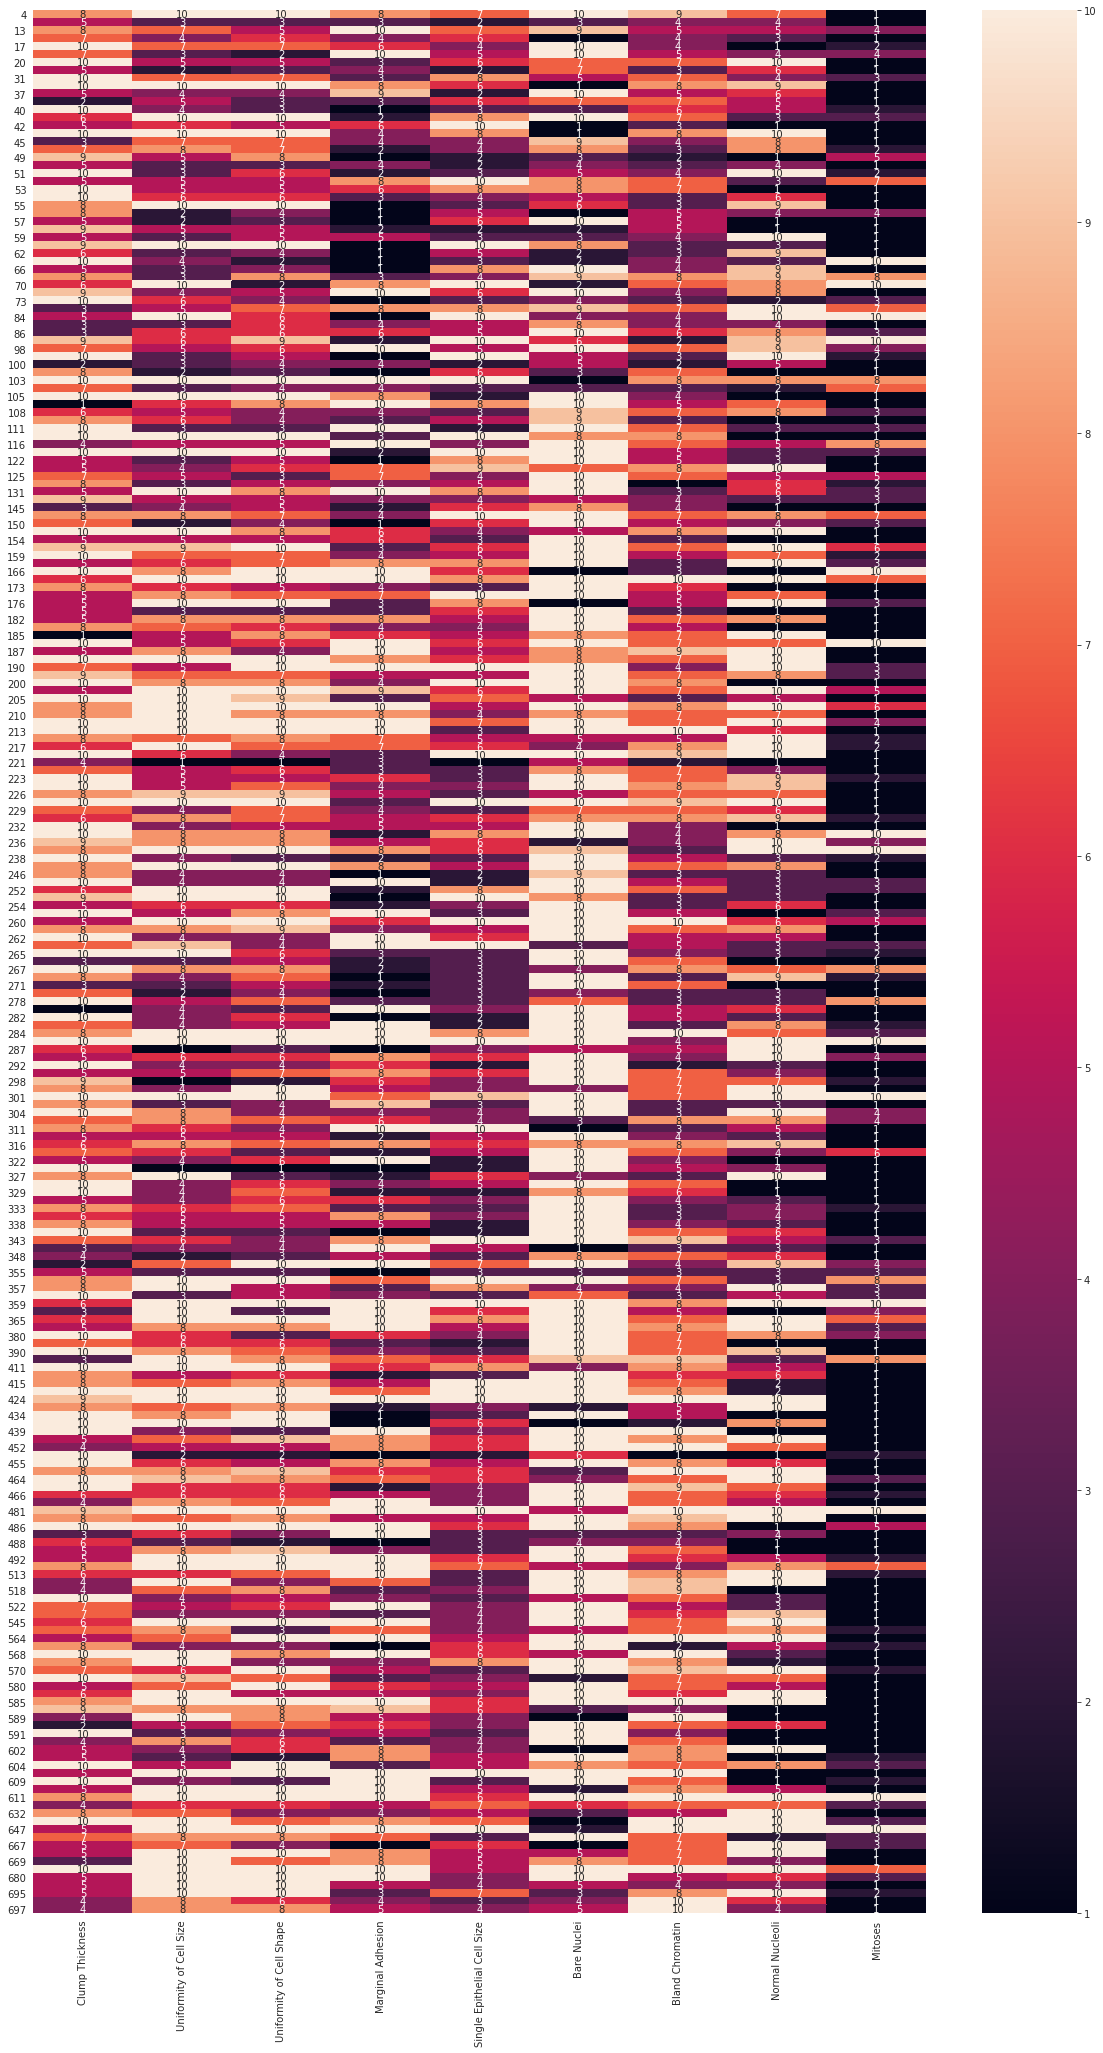

In [43]:
plt.figure(figsize=(20,35))

heat_malignant = cancer_malignant.drop(["Sample code number","Class"], axis=True)

heat_map = sns.heatmap(heat_malignant, annot=True)
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

names = cancer_malignant.columns[0:10]
scaler = MinMaxScaler() 
scaled_prediction = scaler.fit_transform(cancer_prediction.iloc[:,0:10]) 
scaled_prediction = pd.DataFrame(scaled_prediction, columns=names)

In [25]:
cancer_prediction.groupby(by='Class').size()

Class
0.0    443
1.0    239
dtype: int64

In [26]:
scaled_prediction.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.070164,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
1,0.071096,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
2,0.071160,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
3,0.071216,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0
4,0.071223,0.777778,1.000000,1.000000,0.777778,0.666667,1.000000,0.888889,0.666667,0.0


Now all columns range from 0-1 and shows a more normalized dataset.

In [27]:
scaled_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           682 non-null    float64
 1   Clump Thickness              682 non-null    float64
 2   Uniformity of Cell Size      682 non-null    float64
 3   Uniformity of Cell Shape     682 non-null    float64
 4   Marginal Adhesion            682 non-null    float64
 5   Single Epithelial Cell Size  682 non-null    float64
 6   Bare Nuclei                  682 non-null    float64
 7   Bland Chromatin              682 non-null    float64
 8   Normal Nucleoli              682 non-null    float64
 9   Mitoses                      682 non-null    float64
dtypes: float64(10)
memory usage: 53.4 KB


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



X = cancer_prediction.drop("Class", axis = 1)
y = cancer_prediction["Class"]
# model.fit(X.values, y.values)

#Creating training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =100)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(545, 10) (545,)
(137, 10) (137,)


In [29]:
print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 545
Testing Data Count: 137


In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     296.4
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          1.31e-210
Time:                        20:32:41   Log-Likelihood:                 143.47
No. Observations:                 545   AIC:                            -264.9
Df Residuals:                     534   BIC:                            -217.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.2363      0.024     -9.904      0.000      -0.283      -0.189
Sample code number          -6.946e-09   1.35e-08     -0.516      0.606   -3.34e-08    1.95e-08
Clump Thickness                 0.0310      0.004      7.758      0.000       0.023       0.039
Uniformity of Cell Size         0.0277      0.007      4.044      0.000       0.014       0.041
Uniformity of Cell Shape        0.0156      0.007      2.274      0.023       0.002       0.029
Marginal Adhesion               0.0049      0.004      1.103      0.270      -0.004       0.014
Single Epithelial Cell Size     0.0036      0.006      0.637      0.524      -0.008       0.015
Bare Nuclei                     0.0449      0.004     12.683      0.000       0.038       0.052
Bland Chromatin                 0.0210      0.006      3.804      0.000       0.010       0.032
Normal Nucleoli                 0.0187      0.004      4.636      0.000       0.011       0.027
Mitoses                         0.0029      0.005      0.545      0.586      -0.008       0.013
==============================================================================
Omnibus:                       58.157   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              388.450
Skew:                           0.034   Prob(JB):                     4.46e-85
Kurtosis:                       7.135   Cond. No.                     3.69e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
predict_model = model.predict(X_test)
y_preds = model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

# Our target names are our label encoded targets
target_names = ['Benign', ' Malignant']
# Compute classification report
class_report = classification_report(y_true=y_test, y_pred=y_preds, target_names=target_names)
print(class_report)

              precision    recall  f1-score   support

      Benign       0.64      1.00      0.78        87
   Malignant       0.00      0.00      0.00        50

    accuracy                           0.64       137
   macro avg       0.32      0.50      0.39       137
weighted avg       0.40      0.64      0.49       137



/home/puleng/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


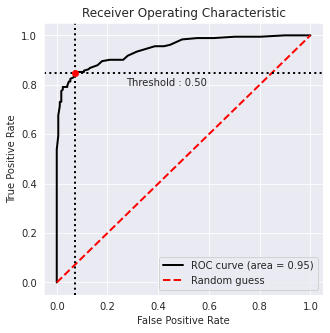

In [35]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=700, n_classes=2, weights=[1,1], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=23)
model = clf.fit(X_train, y_train)


y_pred = clf.predict_proba(X_test)[:,1]

from plot_metric.functions import BinaryClassification

bc = BinaryClassification(y_test, y_pred, labels=["Benign", "Malignant"])

plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

classifiers = [LogisticRegression(random_state=100), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=100),
               RandomForestClassifier(random_state=100)]

### Overdispersion

This is when we have a higher variation from our observation, which is higher than we had inticipated.This can happen when significant predictors in a dataset are missing.